<center><h1>Diving into Data Preprocessing</h1></center>

## Table of contents

* [Feature Engineering](#feat_engg)
    * [Missing Values Treatment](#missing)
    * [Outliers Treatment](#outliers)
    * [Categorical Data Handling](#cat)
    * [Imbalanced Class Handling](#imbal)
    * [Data Transformation](#trans)
    * [Extracting Date](#date)


<a id='feat_engg'></a>
## Feature Engineering

### What is Feature Engineering?
**Feature engineering is about creating new input features from your existing ones.**

This is often one of the most valuable tasks a data scientist can do to improve model performance, for 3 big reasons:

* You can isolate and highlight key information, which helps your algorithms "focus" on what’s important.
* You can bring in your own domain expertise.
* Most importantly, once you understand the "vocabulary" of feature engineering, you can bring in other people’s domain expertise!

*"The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering."* — Luca Massaron

#### Toy dataset

In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

dt = {"col1":[51,22,13,64,50,np.nan,17,580,19,1000],
      "col2":[np.nan,np.nan,89,np.nan,76,np.nan,53,np.nan,900,np.nan],
      "col3":['male','male','male','male','male','male','male',np.nan,'female',np.nan],
      "col4":['good','bad','good',np.nan,'good','bad','bad',np.nan,'good',np.nan]}

data = pd.DataFrame(dt)

data

,col1,col2,col3,col4
0,51.0,NaN,male,good
1,22.0,NaN,male,bad
2,13.0,89.0,male,good
3,64.0,NaN,male,NaN
4,50.0,76.0,male,good
5,NaN,NaN,male,bad
6,17.0,53.0,male,bad
7,580.0,NaN,NaN,NaN
8,19.0,900.0,female,good
9,1000.0,NaN,NaN,NaN


<a id='missing'></a>
### Missing Values Treatment

#### Analyze missing values

In [84]:
data.isna().sum()

col1    1
col2    6
col3    2
col4    3
dtype: int64

In [85]:
data.isna().sum(axis=1).sort_values(ascending=False)

7    3
9    3
3    2
5    2
1    1
0    1
4    0
2    0
6    0
8    0
dtype: int64

In [86]:
# Count of missing values for each row
data.isna().sum(axis=1)

0    1
1    1
2    0
3    2
4    0
5    2
6    0
7    3
8    0
9    3
dtype: int64

### Drop columns

In [87]:
threshold = 0.5

# Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

In [88]:
# Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

data


,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,NaN
4,50.0,male,good
5,NaN,male,bad
6,17.0,male,bad
8,19.0,female,good


In [91]:

# Print mean, median and mode for col1
print(f"Mean of col1: {data['col1'].mean()}")
print(f"Median of col1: {data['col1'].median()}")
print(f"Mode of col1: {data['col1'].mode().iloc[0]}")

Mean of col1: 33.714285714285715
Median of col1: 22.0
Mode of col1: 13.0


### Impute

#### Numerical Imputation

In [ ]:
num_cols = ['col1']

In [94]:
# Filling all missing values with 0
data[num_cols].fillna(data['col1'].mean())

,col1
0,51.000000
1,22.000000
2,13.000000
3,64.000000
4,50.000000
5,33.714286
6,17.000000
8,19.000000


In [95]:
# Filling missing values with medians of the columns
data['col1'].fillna(data['col1'].median())

0    51.0
1    22.0
2    13.0
3    64.0
4    50.0
5    22.0
6    17.0
8    19.0
Name: col1, dtype: float64

In [96]:
# Fill all numerical columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,NaN
4,50.0,male,good
5,22.0,male,bad
6,17.0,male,bad
8,19.0,female,good


#### Categorical Imputation

In [97]:
cat_cols = ['col3', 'col4']

In [99]:
# Max fill function for categorical columns
data['col3'].fillna(data['col3'].value_counts().idxmax())

0      male
1      male
2      male
3      male
4      male
5      male
6      male
8    female
Name: col3, dtype: object

In [100]:
# Fill all categorical columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())
    
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,good
4,50.0,male,good
5,22.0,male,bad
6,17.0,male,bad
8,19.0,female,good


In [102]:
print(f"Mean of col1: {data['col1'].mean()}")


Mean of col1: 32.25


<a id='outliers'></a>
### Outliers Treatment

#### Detect outliers using boxplots

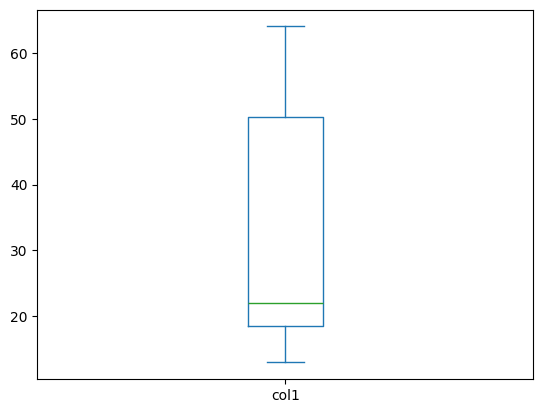

In [101]:
data.plot.box();

#### Detect outliers using interquartile range

In [103]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [104]:
for col in num_cols:
    print(col,'-->',detect_outlier(data[col]))

col1 --> []


#### Caping the outliers

In [105]:
for col in num_cols:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = data[col].median()

In [106]:
data

,col1,col3,col4
0,51.0,male,good
1,22.0,male,bad
2,13.0,male,good
3,64.0,male,good
4,50.0,male,good
5,22.0,male,bad
6,17.0,male,bad
8,19.0,female,good


#### Droping the rows that contain outliers

In [107]:
for col in num_cols:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = np.nan

data.dropna(inplace=True)

<a id='cat'></a>
### Categorical Data Handling

#### Label Encoding

In [109]:
for col in cat_cols:
    data[col] = data[col].astype('category')
    print(col,'---->', dict(enumerate(data[col].cat.categories)))
    data[col] = data[col].cat.codes

col3 ----> {0: 'female', 1: 'male'}
col4 ----> {0: 'bad', 1: 'good'}


In [110]:
data

,col1,col3,col4
0,51.0,1,1
1,22.0,1,0
2,13.0,1,1
3,64.0,1,1
4,50.0,1,1
5,22.0,1,0
6,17.0,1,0
8,19.0,0,1


#### One Hot Encoding

In [111]:
data = pd.get_dummies(data, columns=cat_cols, prefix=cat_cols)

data

,col1,col3_0,col3_1,col4_0,col4_1
0,51.0,False,True,False,True
1,22.0,False,True,True,False
2,13.0,False,True,False,True
3,64.0,False,True,False,True
4,50.0,False,True,False,True
5,22.0,False,True,True,False
6,17.0,False,True,True,False
8,19.0,True,False,False,True


<a id='imbal'></a>
### Imbalanced Class Handling

In [ ]:
# !pip install -U imbalanced-learn

#### Toy dataset

In [114]:
from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [115]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Data shape: (60,)


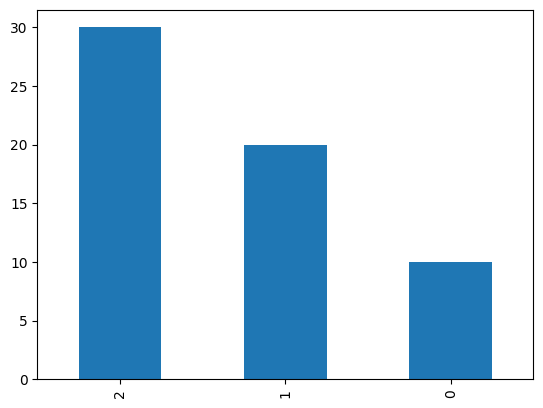

In [117]:
from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
X, y = make_imbalance(X, y, sampling_strategy={0: 10, 1: 20, 2: 30}, random_state=42)

print("Data shape:", y.shape)
pd.Series(y).value_counts().plot.bar();

#### Oversampling: SMOTE

Data shape: (90,)


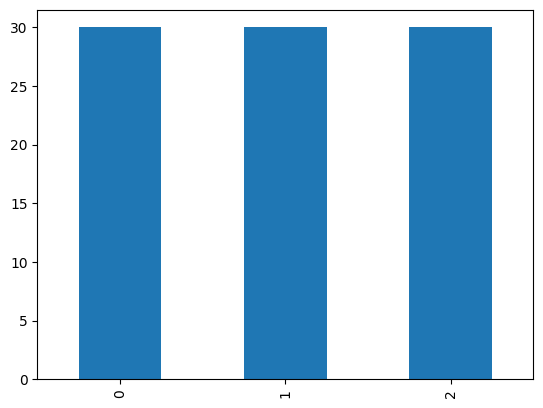

In [118]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_smt, y_smt = sm.fit_resample(X, y)

print("Data shape:", y_smt.shape)
pd.Series(y_smt).value_counts().plot.bar();

#### Undersampling

Data shape: (30,)


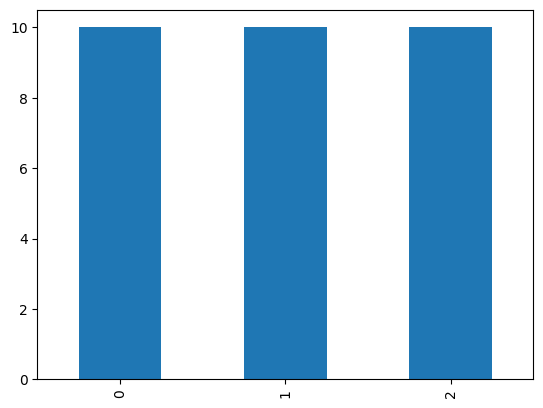

In [119]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("Data shape:", y_rus.shape)
pd.Series(y_rus).value_counts().plot.bar();

In [120]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<a id='trans'></a>
### Data Transformation

Data Transformation is performed to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

There are 3 popular methods to transform data:
* Scaling
* Normalization
* Standardization

### Scaling

In scaling, you transform the data such that the features are within a specific range e.g. [0, 1].

${\displaystyle x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}$

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the rescaled value. 

Scaling is important in the algorthms such as support vector machines (SVM) and k-nearest neighbors
(KNN) where distance betYouen the data points is important. For example, in the dataset containing
prices of products; without scaling, SVM might treat 1 USD equivalent to 1 INR though 1 USD = 65
INR.

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# set seed for reproducibility
np.random.seed(10)

# generate 1000 data points randomly drawn from an exponential distr
original_data = np.random.exponential(size = 1000)

In [126]:
original_data

array([7.95874508e-01, 1.25593076e+00, 9.23223146e-01, 7.87201152e-01,
       5.51048491e-01, 1.03815929e+00, 5.75519199e-01, 2.22352441e+00,
       3.31491218e+00, 4.83602101e-01, 1.56889614e+00, 7.52674110e-01,
       8.39432847e-01, 2.59825415e+00, 7.36853549e-02, 9.11610291e-02,
       2.04255867e-02, 1.78748768e+00, 1.50578423e+00, 2.04031428e+00,
       3.84522184e+00, 1.60523956e+00, 6.18929459e-01, 1.51653598e+00,
       1.25874412e-01, 1.02143189e+00, 1.54729683e-01, 2.89442045e+00,
       7.37827278e-01, 5.35565718e-01, 3.07280353e-01, 1.48825484e+00,
       6.09082416e-01, 8.40334707e-01, 1.89685717e-02, 9.61380929e-01,
       9.46996678e-01, 9.59547973e-01, 2.87791508e+00, 1.14513896e+00,
       4.45518493e-01, 5.74532409e-01, 1.19610780e+00, 6.21152959e-02,
       1.09891248e+00, 1.11059743e+00, 2.36206705e-01, 1.38028688e-01,
       3.78961966e-01, 4.52102056e-01, 8.44427781e-01, 5.77324311e-01,
       4.45449738e+00, 1.07635113e-01, 2.34301516e-01, 1.75913553e-01,
      

In [123]:
# mix-max scale the data betYouen 0 and 1
scaled_data = minmax_scale(original_data)

In [124]:
scaled_data

array([9.29069355e-02, 1.46648782e-01, 1.07783271e-01, 9.18937503e-02,
       6.43073845e-02, 1.21209631e-01, 6.71659502e-02, 2.59679024e-01,
       3.87170377e-01, 5.64285794e-02, 1.83208088e-01, 8.78604457e-02,
       9.79952384e-02, 3.03453385e-01, 8.54382012e-03, 1.05852553e-02,
       2.32223683e-03, 2.08743037e-01, 1.75835619e-01, 2.38277183e-01,
       4.49118933e-01, 1.87453574e-01, 7.22369551e-02, 1.77091593e-01,
       1.46403274e-02, 1.19255605e-01, 1.80110794e-02, 3.38050292e-01,
       8.61261010e-02, 6.24987517e-02, 3.58314105e-02, 1.73787909e-01,
       7.10866648e-02, 9.81005899e-02, 2.15203443e-03, 1.12240703e-01,
       1.10560395e-01, 1.12026585e-01, 3.36122204e-01, 1.33706547e-01,
       5.19798116e-02, 6.70506775e-02, 1.39660514e-01, 7.19225424e-03,
       1.28306564e-01, 1.29671551e-01, 2.75288843e-02, 1.60601390e-02,
       4.42049566e-02, 5.27488760e-02, 9.85787256e-02, 6.73768158e-02,
       5.20291952e-01, 1.25096888e-02, 2.73063280e-02, 2.04856906e-02,
      

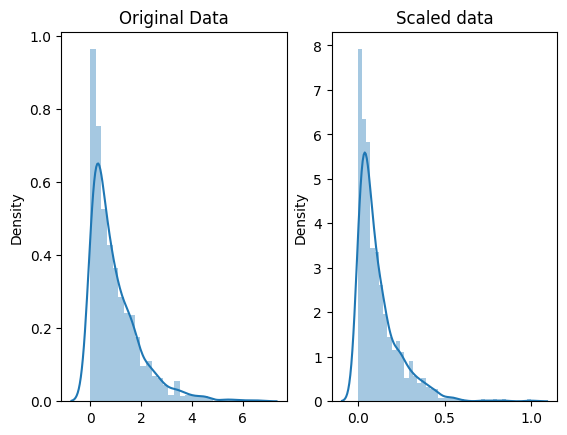

In [129]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

### Normalization
The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution (Gaussian distribution), also known as the bell curve, is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean.

The general formula is given as:

${\displaystyle x'={\frac {x-{\text{mean}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}}$

where ${\displaystyle x}$ is an original value, ${\displaystyle x'}$ is the normalized value. 

In [130]:
# for Box-Cox Transformation
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

In [131]:
normalized_data

(array([ 0.410208  , -2.39448983,  0.00415501,  0.33777201, -0.35278639,
        -1.14286538, -1.23958205,  0.37508096, -1.3531397 , -1.75394085,
         0.14814612,  1.30922806, -2.86485595, -0.31705045,  0.55337562,
        -0.05290501,  0.25468836, -0.9241054 ,  1.03930996,  0.23324203,
        -0.23779006, -1.46978663, -0.68733683,  0.11625514, -0.50180215,
        -0.52259483, -0.03882107, -0.31458126,  0.05003821, -0.08362436,
         0.52655625, -0.29237244,  0.9844615 , -0.84189256, -1.74086477,
        -0.89723245, -1.60769337,  0.61375153, -2.06869014, -0.01582347,
        -0.22460114,  0.57805906, -1.23626854,  0.72835552, -0.74820749,
         0.35625679, -0.91161779,  0.85278944, -0.82346871, -1.37010327,
        -0.63446304, -1.72269436,  0.58488341, -1.4295017 , -0.65754717,
         1.22840092,  1.82081662, -0.46350581,  0.60392044, -1.05270331,
        -0.09339185,  0.95146496, -0.25866245, -0.11243892, -2.14627592,
        -0.73256567, -1.81010533, -0.88288327, -0.8

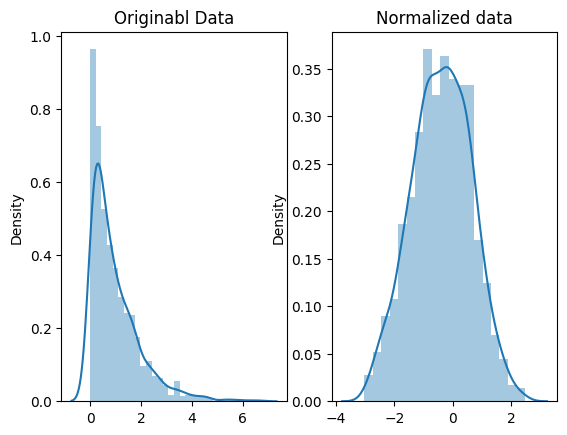

In [132]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Originabl Data")

sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In scaling, you’re changing the range of your data while in normalization you’re changing the shape of
the distribution of your data.

You need to normalize our data if you’re going use a machine learning or statistics technique that
assumes that data is normally distributed e.g. t-tests, ANOVAs, linear regression, linear discriminant
analysis (LDA) and Gaussian Naive Bayes.

### Standardization
Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

${\displaystyle x'={\frac {x-{\bar {x}}}{\sigma }}}$

Where $x$ is the original feature vector, ${\bar{x}={\text{average}}(x)}$ is the mean of that feature vector, and $\sigma$ is its standard deviation.

In [133]:
from sklearn.preprocessing import StandardScaler

standerdized_data = StandardScaler().fit_transform(original_data.reshape(1, -1))

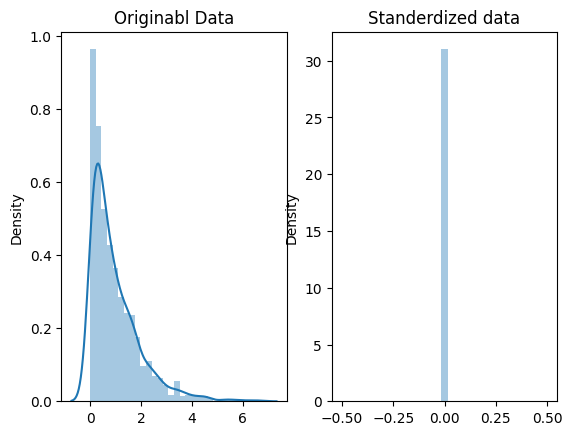

In [134]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Originabl Data")

sns.distplot(standerdized_data, ax=ax[1])
ax[1].set_title("Standerdized data")
plt.show()

It’s widely used in SVMs, logistics regression and neural networks.

#### Applications of Data Transformation
In stochastic gradient descent, feature scaling can sometimes improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors.

<a id='date'></a>
### Extracting Date
We can perform the following engineering to the date time variales:
* Extracting the parts of the date into different columns: Year, month, day, etc.
* Extracting the time period between the current date and columns in terms of years, months, days, etc.
* Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

In [135]:
from datetime import date

data = pd.DataFrame({'date':['01-01-2017', 
                             '04-12-2008', 
                             '23-06-1988', 
                             '25-08-1999', 
                             '20-02-1993',]})
data

,date
0,01-01-2017
1,04-12-2008
2,23-06-1988
3,25-08-1999
4,20-02-1993


In [137]:
#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

data

,date
0,2017-01-01
1,2008-12-04
2,1988-06-23
3,1999-08-25
4,1993-02-20


In [138]:
#Extracting Year
data['year'] = data['date'].dt.year

data

,date,year
0,2017-01-01,2017
1,2008-12-04,2008
2,1988-06-23,1988
3,1999-08-25,1999
4,1993-02-20,1993


In [139]:
#Extracting Month
data['month'] = data['date'].dt.month

data

,date,year,month
0,2017-01-01,2017,1
1,2008-12-04,2008,12
2,1988-06-23,1988,6
3,1999-08-25,1999,8
4,1993-02-20,1993,2


In [140]:
#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

data

,date,year,month,passed_years
0,2017-01-01,2017,1,8
1,2008-12-04,2008,12,17
2,1988-06-23,1988,6,37
3,1999-08-25,1999,8,26
4,1993-02-20,1993,2,32


In [141]:
#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

data

,date,year,month,passed_years,passed_months
0,2017-01-01,2017,1,8,104
1,2008-12-04,2008,12,17,201
2,1988-06-23,1988,6,37,447
3,1999-08-25,1999,8,26,313
4,1993-02-20,1993,2,32,391


In [142]:
#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,8,104,Sunday
1,2008-12-04,2008,12,17,201,Thursday
2,1988-06-23,1988,6,37,447,Thursday
3,1999-08-25,1999,8,26,313,Wednesday
4,1993-02-20,1993,2,32,391,Saturday
